---
# Ejercicio 6
Utilice el método del rechazo y los resultados del ejercicio anterior para desarrollar otros dos
métodos, además del método de la transformada inversa, para generar una variable aleatoria con distribución de probabilidad:
$$
F(x) = x^n, \quad 0\leq x \leq 1
$$

Analice la eficiencia de los tres métodos para generar la variable a partir de F



In [30]:
from typing import Callable
from random import random
from time import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

Debo utilizar M, m, el método de rechazo y el método de la transformada inversa para realizar una comparación de eficiencia al generar F.

Una particularidad que debemos tener en cuenta que $n$ debe ser entero positivo ya que sino $F$ no estaría definida para entornos de probabilidad

# Método de composición

De los ejercicios anteriores teníamos que:
$$
F_M (x) = \prod_{i=1}^nF_i(x)
$$

Ahora en este caso tenemos que generar:
$$
F_X(x) = x^n, \quad 0 \leq x \leq 1
$$

Pero esto es lo mismo que escribir:
$$
\begin{align*}
    F_X(x) &= \underbrace{x \cdot x \cdot \ldots \cdot x}_{n \text{ veces}}
           &= \prod_{i=1}^n x
\end{align*}
$$

Luego utilizando $F_{X_i}(x) = x$, con los $X_i \thicksim \mathcal{U}(0,1)$  por ende:

$$
\begin{align*}
    F_M(x) &= \prod_{i=1}^n F_i(x) \\[0.4cm]
           &= \prod_{i=1}^n F_{X_i}(x)\\[0.4cm]
           &= \underbrace{x \cdot x \cdot \ldots \cdot x}_{n \text{ veces}}\\[0.4cm]
           &= F_X
\end{align*}
$$

In [50]:
#Variable aleatoria del ejercicio 5
def M(N:int) -> float:
    """
    Variable aleatoria Máx{X_1,...,X_n}

    Args:
        Xs (list[Callable[[],float]]): Lista de variables aleatorias

    Returns:
        float: Máximo valor generado por las variables aleatorias
    """    
    samples = [random() for _ in range(N)]
    return max(samples)

# Método de rechazo

El método de rechazo se basa en generar una variable aleatoria, en este caso $x^n,0\leq x \leq 1$ utilizando $M$ y $m$.
Para ello se deben cumplir:
$$
\frac{f(y)}{g(y)} \leq c, \quad \forall y \in \mathbb{R} \text{ tal que }f(y) \neq 0 
$$

Donde $g(y)$ es una función propuesta por mi, en este caso, dado que $f(x) \neq 0$ en el intervalo $(0, 1)$ utilizo una variable $Y \thicksim \mathcal{U} (0,1)$, luego $g(y) = 1$

Para hallar $f$ fdp, por definición tenemos que $f(x) = F'(x)$

Luego:
$$
\displaystyle f(x) = n \cdot x^{(n-1)} 
$$


## Análisis cota c

Sea $\displaystyle h(x)=\frac{f(x)}{g(x)} = f(x), \quad 0 \leq x \leq 1$

Como $h(x)$ es una función creciente, continua y está acotada tal que $0 \leq x \leq 1$, es evidente que su máximo valor se encontrará en el extremo superior, tal que:

Si $x=1 \Longrightarrow$
$$
f(1) = n \cdot 1^{n-1} = n
$$

Luego $c = n$

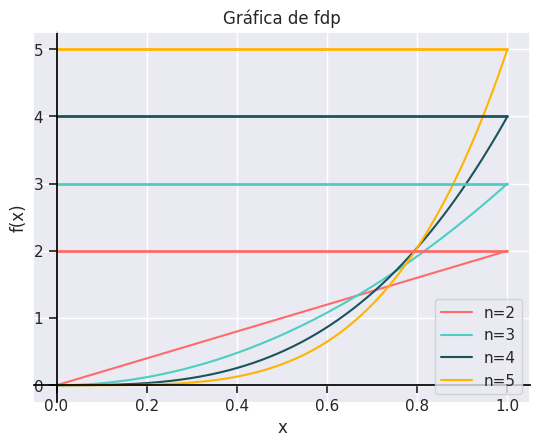

In [27]:
x = np.linspace(0,1, 1000)
f = lambda x, n: n * (x ** (n-1))


fig, ax = plt.subplots()

sns.lineplot(x=x, y=f(x, 2), label="n=2", ax=ax, color="#FF6B6B")
sns.lineplot(x=x, y=f(x, 3), label="n=3", ax=ax, color="#4ECDC4")
sns.lineplot(x=x, y=f(x, 4), label="n=4", ax=ax, color="#1A535C")
sns.lineplot(x=x, y=f(x, 5), label="n=5", ax=ax, color="#FFB400")

#Cotas
sns.lineplot(x=x, y= 2, ax=ax, linewidth=2, color="#FF6B6B")
sns.lineplot(x=x, y= 3, ax=ax, linewidth=2, color="#4ECDC4")
sns.lineplot(x=x, y= 4, ax=ax, linewidth=2, color="#1A535C")
sns.lineplot(x=x, y= 5, ax=ax, linewidth=2, color="#FFB400")

ax.spines['left'].set_position('zero')   
ax.spines['bottom'].set_position('zero') 
ax.spines['left'].set_color('Black')
ax.spines['bottom'].set_color('Black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de fdp")
plt.legend()
plt.show()  

In [32]:
def MR(N:int) -> float:
    """
    Generación de variable aleatoria
    Por el método de rechazo

    Args:
        N (int): Parámetro de función de distro. acumulada
        (Del ejercicio)

    Returns:
        float: Valor aleatorio
    """
    while True:
        Y = random() # Simulo f
        f_y = N * (Y ** (N-1))
        U = random()
        if U < (1/N) * f_y:
            return Y

# Transformada inversa
En este caso es simple.

$$
\begin{align*}
    U &= F(x) \quad, \text{ahora despejo } x \\[0.4cm]
    U &= x^n \\[0.4cm]
    \sqrt[n]{U} &= x 
\end{align*}
$$

Luego el algoritmo resulta:

In [39]:
def TIX(N:int) -> float:
    """
    Generación de variable aleatoria
    Por el método de la transformada inversa

    Args:
        N (int): Parámetro de función de distro. acumulada
        (Del ejercicio) 

    Returns:
        float: Valor aleatorio
    """
    U = random()
    return U ** (1/N)

# Comparativa gráfica

In [51]:
def efitienty_methods(methods:list[Callable[[int],float]], N:int,Nsim=int) -> dict:
    results = {}
    
    #Simulaciones
    for method in methods:
        init_time = time()
        method_name =  method.__name__
        samples = []

        for _ in range(Nsim):
            sample = method(N=N)
            samples.append(sample)
        
        elapsed_time = time() - init_time 
        results[method_name] = {
            "samples": samples,
            "time": elapsed_time
        }
    
    return results

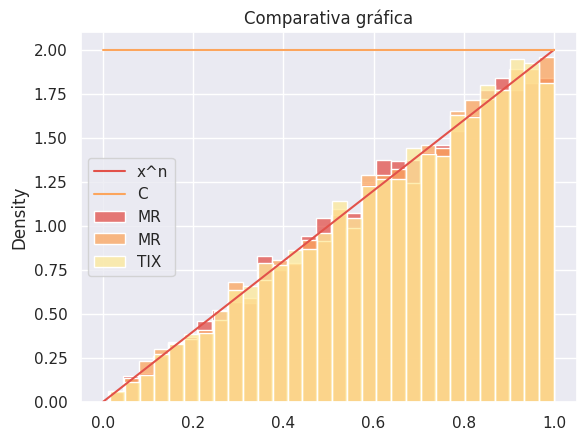

COMPARACIÓN DEL TIEMPO
----------- --- ------
(MR) ⌛ -> 0.009427 seg
(MR) ⌛ -> 0.009716 seg
(TIX)⌛ -> 0.003921 seg


In [52]:
N = 2
Nsim= 10_000
x = np.linspace(0, 1, 1000)
f = lambda x, N  :  N * x ** (N-1)

methods = [M, MR, TIX]
results: dict = efitienty_methods(
    methods=methods,
    N=N,
    Nsim=Nsim
)

sns.set_palette("Spectral")
sns.lineplot(x=x, y=f(x, N), label="x^n")
sns.lineplot(x=x, y=N, label="C" )
sns.histplot(results["M"]["samples"], stat='density', label="MR")
sns.histplot(results["MR"]["samples"], stat='density', label="MR")
sns.histplot(results["TIX"]["samples"], stat='density', label="TIX")
plt.title("Comparativa gráfica")
plt.legend()
plt.show()


print("COMPARACIÓN DEL TIEMPO")
print("----------- --- ------")

print(f"(MR) ⌛ -> {results["M"]["time"]:4f} seg")
print(f"(MR) ⌛ -> {results["MR"]["time"]:4f} seg")
print(f"(TIX)⌛ -> {results["TIX"]["time"]:4f} seg")
